(10000, 384)
[0 1 2 3 4 5 6 7 8 9]


/home/yu.yamaoka.qiqb/Qulacs-LLP/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


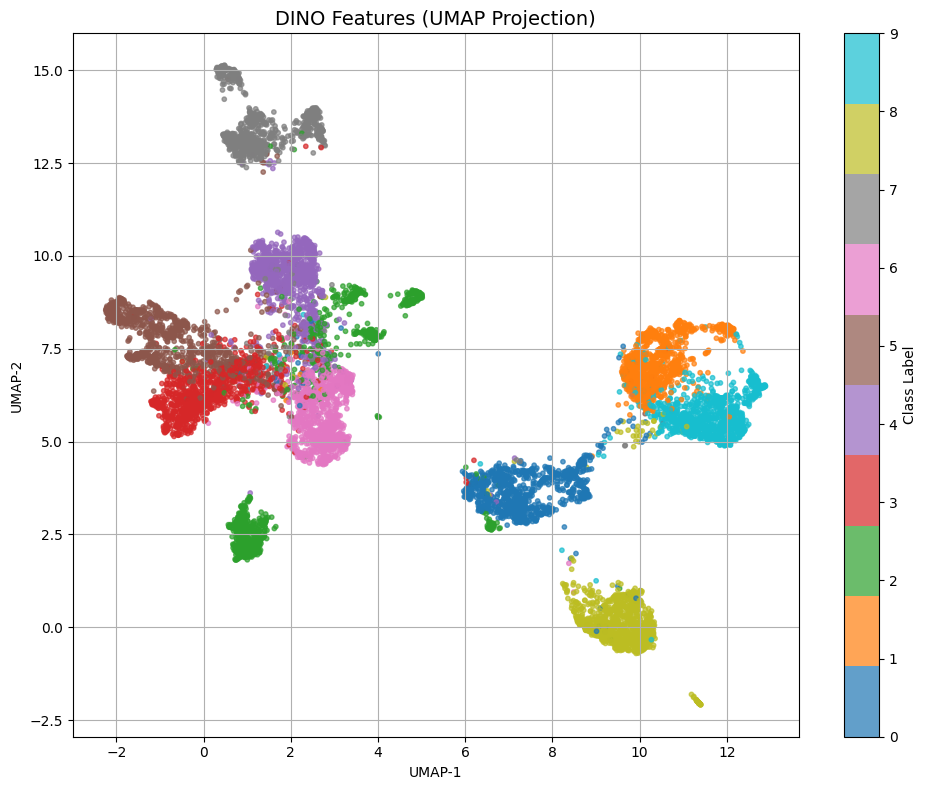

In [4]:
TRAIN_DATA_PATH = "data/CIFAR10_test_features.pt"
TEST_DATA_PATH = "data/CIFAR10_test_features.pt"

import torch
import umap
import matplotlib.pyplot as plt
import numpy as np

# 1. 特徴量の読み込み
data = torch.load(TRAIN_DATA_PATH)  # 拡張子は.ptだがファイル名は任意

# 2. 特徴量とラベルを抽出
features = data['features'].cpu().numpy()  # [N, D]
labels = data['labels'].cpu().numpy()      # [N]
print(features.shape)
print(np.unique(labels))

# 3. UMAP 次元圧縮
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(features)  # [N, 2]

# 4. 可視化（ラベルごとに色分け）
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
plt.title("DINO Features (UMAP Projection)", fontsize=14)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(scatter, label="Class Label")
plt.grid(True)
plt.tight_layout()
plt.show()


RidgeClassifier で分類精度を確認

In [5]:
import torch
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. データ読み込み
train_data = torch.load(TRAIN_DATA_PATH)
test_data = torch.load(TEST_DATA_PATH)

# 2. 特徴量とラベルを抽出
X_train = train_data['features'].cpu().numpy()
y_train = train_data['labels'].cpu().numpy()
X_test = test_data['features'].cpu().numpy()
y_test = test_data['labels'].cpu().numpy()

# 3. RidgeClassifier の学習
clf = RidgeClassifier(alpha=1.0)
clf.fit(X_train, y_train)

# 4. 予測と評価
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc:.4f}\n")

print("📄 Classification Report:")
print(classification_report(y_test, y_pred))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9559

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1000
           1       0.96      0.98      0.97      1000
           2       0.95      0.94      0.94      1000
           3       0.90      0.91      0.91      1000
           4       0.95      0.94      0.95      1000
           5       0.96      0.91      0.93      1000
           6       0.93      0.99      0.96      1000
           7       0.99      0.98      0.98      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

📊 Confusion Matrix:
[[969   1   5   4   1   0   1   1  16   2]
 [  2 980   1   2   0   0   2   0   0  13]
 [  6   0 936  12  17   3  22   2   1   1]
 [  8   3  11 914  16  31  14   2   0   1]
 [ 